## Лабораторная работа №1 | Вариант 5

Выполнила: Тимофеева Ирина, М8О-311Б-23

### 1. Numpy

In [ ]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [ ]:
identity_matrix = np.identity(3)

identity_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [ ]:
custom_dt = np.dtype([("R", 'B'), ("G", 'B'), ("B", 'B'), ("A", 'B')])

color = np.ones((2, 1), dtype=custom_dt)

color, color[0]['A']

(array([[(1, 1, 1, 1)],
        [(1, 1, 1, 1)]],
       dtype=[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]),
 array([1], dtype=uint8))

In [ ]:
custom_dt.itemsize

4

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [ ]:
import warnings

warnings.filterwarnings('ignore')

4. Создайте случайный вектор размера 10 и отсортируйте его

In [ ]:
random_array = np.random.rand(10)

sorted_random_array = np.sort(random_array)

random_array, sorted_random_array

(array([0.76483457, 0.81907735, 0.5339026 , 0.36258238, 0.06488182,
        0.23748689, 0.29423758, 0.10149485, 0.99629284, 0.95287443]),
 array([0.06488182, 0.10149485, 0.23748689, 0.29423758, 0.36258238,
        0.5339026 , 0.76483457, 0.81907735, 0.95287443, 0.99629284]))

5. Создайте read-only массив(неизменяемый)

In [ ]:
immutable_array = np.zeros(10)

immutable_array.flags.writeable=False

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [ ]:
def cartesian_to_polar(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho

cartesian_coords = np.random.rand(10, 2)

polar_coords = np.array([cartesian_to_polar(x, y) for x, y in cartesian_coords])

cartesian_coords, polar_coords

(array([[0.10804389, 0.56898646],
        [0.56498562, 0.56926239],
        [0.53439144, 0.33484383],
        [0.9420787 , 0.43374246],
        [0.86193365, 0.3888487 ],
        [0.74589807, 0.42414531],
        [0.63258831, 0.67260061],
        [0.44512199, 0.7640054 ],
        [0.11563537, 0.73464507],
        [0.68019749, 0.09775548]]),
 array([[1.38314216, 0.57915375],
        [0.78916872, 0.80204016],
        [0.5597412 , 0.63063032],
        [0.43147709, 1.03713297],
        [0.42379765, 0.94558602],
        [0.51703924, 0.85805779],
        [0.81604489, 0.92334152],
        [1.04325704, 0.88421595],
        [1.41467422, 0.74369006],
        [0.14273895, 0.68718611]]))

7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [ ]:
coords = np.linspace(0, 1, endpoint=True, num=10)
coords = np.vstack((coords, coords))
coords


array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [ ]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

res = np.fromfunction(lambda i, j: 1 / (x[i.astype(int)] + y[j.astype(int)]), (2, 5))

res

array([[  0.34824763,   0.52867399,   0.49429456,   0.33366054,
        -15.10894544],
       [  0.2838566 ,   0.39325017,   0.37390574,   0.27408947,
          1.70881842]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [ ]:
array = np.linspace(0, 10, num=25, dtype=np.float32)

array = array.astype(np.int32, copy=False)

array

array([ 0,  0,  0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,
        7,  7,  7,  8,  8,  9,  9, 10], dtype=int32)

10. Как случайно заменить p элементов в 2D массиве?

In [ ]:
p = 5
array = np.random.rand(2,5) * 10
flatten_array = array.flatten()
mask = np.zeros(array.shape[0] * array.shape[1], dtype=np.bool)
while p:
  i = np.random.randint(0, array.shape[0] * array.shape[1])
  if (~mask[i]):
    flatten_array[i] = np.random.randint(11, 16)
    mask[i] = True
    p -= 1

array = flatten_array.reshape(array.shape)

array

array([[ 1.45924244,  0.91500733,  3.87491852, 14.        , 14.        ],
       [ 0.48798582, 11.        ,  0.97044214, 11.        , 15.        ]])

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/data.csv")

1. Узнайте сколько было на борту человек

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count = 891

2. Какой медианный и средний возраста пассажиров

In [ ]:
df.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


mean = 29.699, median=50p=28

3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [38]:
df[df.Age < 16].Survived.mean() * 100, df[df.Age > 16].Survived.mean() * 100

(np.float64(59.036144578313255), np.float64(38.273615635179155))

4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

Нет информации о том, кто первым садился в шлюпку

5. Зависит ли выживаемость от класса обслуживания?

In [97]:
print(f"Survival rate:\nclass 1: {df[df.Pclass == 1].Survived.mean()}\nclass 2: {df[df.Pclass == 2].Survived.mean()}\nclass 3: {df[df.Pclass == 3].Survived.mean()}")

Survival rate:
class 1: 0.6296296296296297
class 2: 0.47282608695652173
class 3: 0.24236252545824846


Выживаемость зависит от класса обслуживания(1 класс выжил в 70 процентах случаев, когда как 3 в 25 процентах)

6. Посчитайте средний возраст умерших женщин и мужчин

In [50]:
dead_passengers = df[df['Survived'] == 0]
mean_age_dead_by_sex = dead_passengers.groupby('Sex')['Age'].mean()

for sex, mean_age in mean_age_dead_by_sex.items():
    print(f"{sex}: {mean_age:.2f}")

female: 25.05
male: 31.62


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [52]:
df['HasRelatives'] = (df['SibSp'] + df['Parch']) > 0

survival_with_relatives = df[df['HasRelatives']]['Survived'].mean() * 100
survival_alone = df[~df['HasRelatives']]['Survived'].mean() * 100

print(f"С родственниками: {survival_with_relatives:.2f}")
print(f"Одиночки: {survival_alone:.2f}")

   С родственниками: 50.56%
   Одиночки: 30.35%


Различие в выживаемости есть

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [54]:
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_died = df[df['Survived'] == 0]['Fare'].mean()

print(f"Выжившие: {mean_fare_survived:.2f}")
print(f"Умершие: {mean_fare_died:.2f}")

   Выжившие: $48.40
   Умершие: $22.12


Различие есть

9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [55]:
survived_2nd_class = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]
max_age = survived_2nd_class['Age'].max()
min_age = survived_2nd_class['Age'].min()

print(f"Максимальный возраст: {max_age:.1f} лет")
print(f"Минимальный возраст: {min_age:.1f} лет")

Максимальный возраст: 62.0 лет
Минимальный возраст: 0.7 лет


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [57]:
men_18_plus = df[(df['Sex'] == 'male') & (df['Age'] >= 18)]

young_men = men_18_plus[men_18_plus['Age'] <= 35]
adult_men = men_18_plus[men_18_plus['Age'] > 35]

young_survival = young_men['Survived'].mean() * 100
adult_survival = adult_men['Survived'].mean() * 100

print(f"Молодые: {young_survival:.1f}%")
print(f"Взрослее: {adult_survival:.1f}%")

Молодые: 17.5%
Взрослее: 18.1%


Гипотеза опровергнута

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [59]:
import matplotlib.pyplot as plt

1. Постройте гистограмму распределения возростов пассажиров

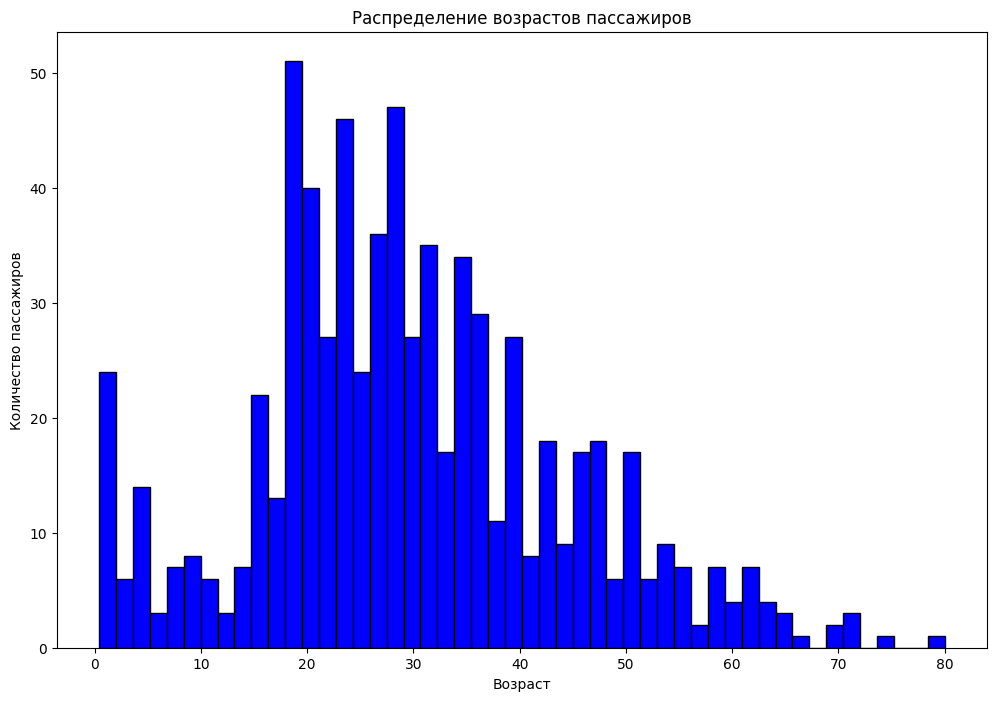

In [68]:
plt.figure(figsize=(12, 8))
plt.hist(df['Age'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

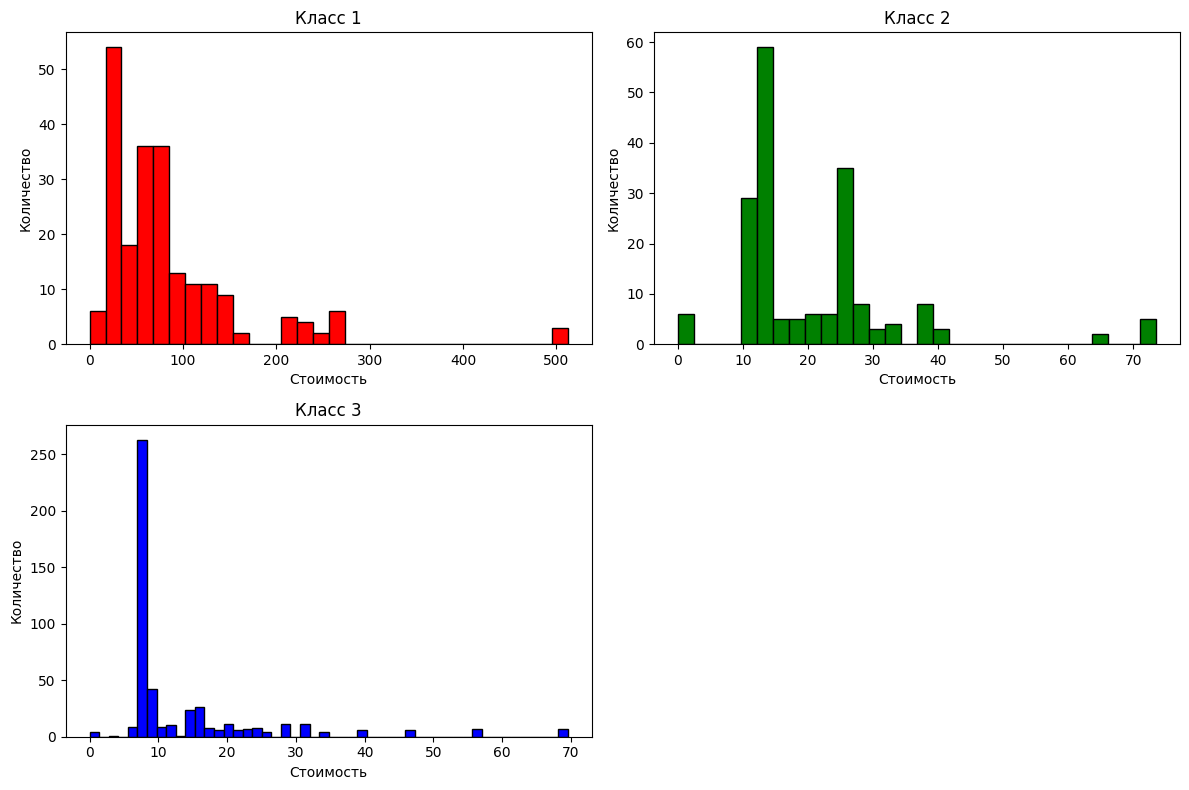

In [73]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
class1_data = df[df['Pclass'] == 1]['Fare']
plt.hist(class1_data, bins=30, color='red', edgecolor='black')
plt.title('Класс 1')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

plt.subplot(2, 2, 2)
class2_data = df[df['Pclass'] == 2]['Fare']
plt.hist(class2_data, bins=30, color='green', edgecolor='black')
plt.title('Класс 2')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

plt.subplot(2, 2, 3)
class3_data = df[df['Pclass'] == 3]['Fare']
plt.hist(class3_data, bins=50, color='blue', edgecolor='black')
plt.title('Класс 3')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

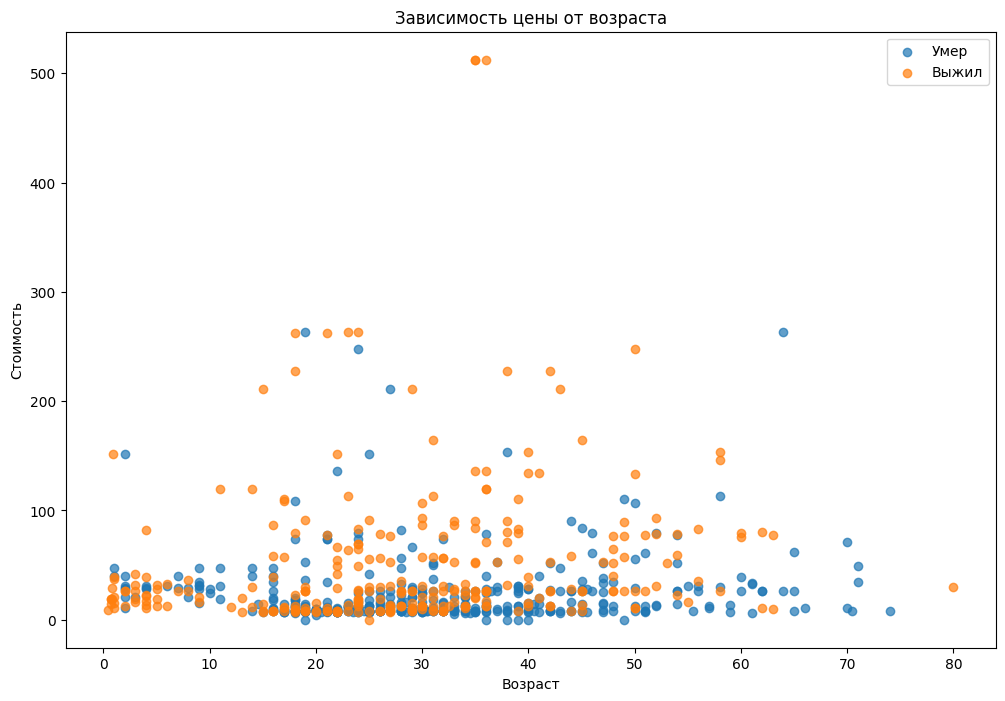

In [72]:
plt.figure(figsize=(12, 8))
for survived in [0, 1]:
    data = df[df['Survived'] == survived]
    plt.scatter(data['Age'], data['Fare'], alpha=0.7, label='Выжил' if survived else 'Умер')
plt.title('Зависимость цены от возраста')
plt.xlabel('Возраст')
plt.ylabel('Стоимость')
plt.legend()
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

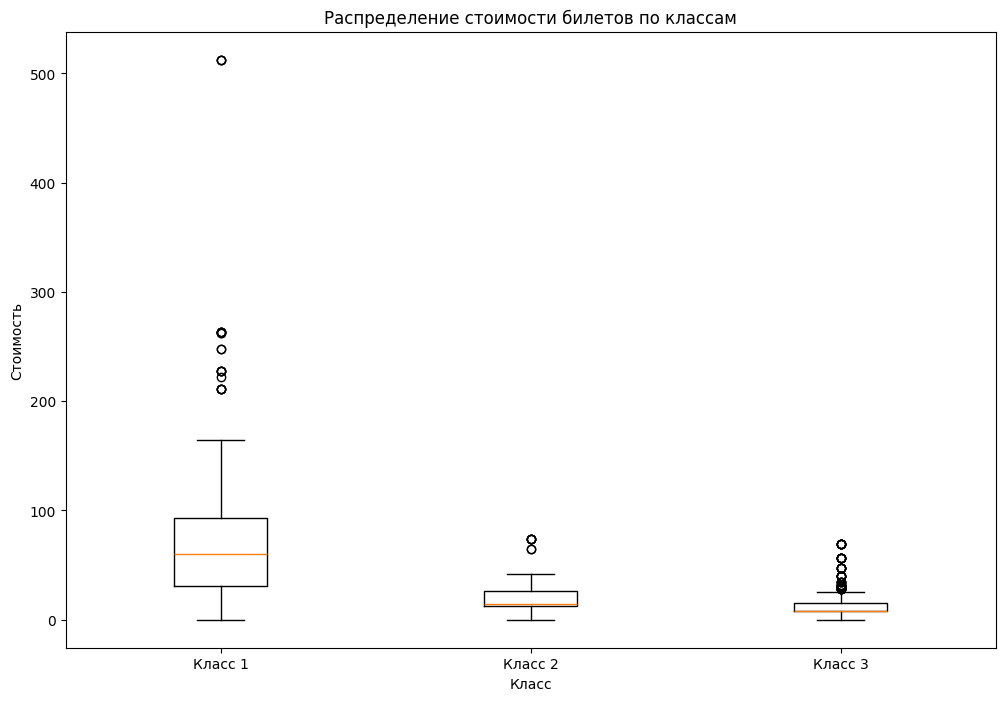

In [77]:
# 4. Box plot распределения цен по классам
plt.figure(figsize=(12, 8))
plt.boxplot([df[df['Pclass'] == 1]['Fare'],
             df[df['Pclass'] == 2]['Fare'],
             df[df['Pclass'] == 3]['Fare']],
            labels=['Класс 1', 'Класс 2', 'Класс 3'])
plt.title('Распределение стоимости билетов по классам')
plt.xlabel('Класс')
plt.ylabel('Стоимость')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

In [86]:
df.Sex.head()

,Sex
0,male
1,female
2,female
3,female
4,male


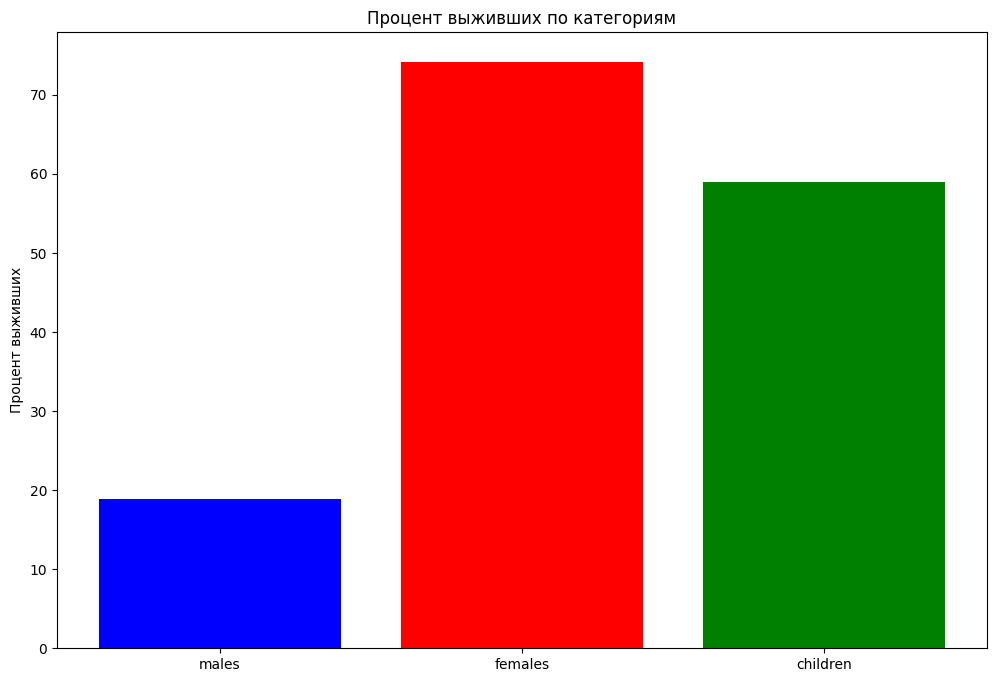

In [88]:
plt.figure(figsize=(12, 8))

survival_rates = [
    df[df.Sex == 'male'].Survived.mean() * 100,
    df[df.Sex == 'female'].Survived.mean() * 100,
    df[df.Age < 16].Survived.mean() * 100
]

categories = [
    'males',
    'females',
    'children'
]

plt.bar(categories, survival_rates, color=['blue', 'red', 'green'])
plt.title('Процент выживших по категориям')
plt.ylabel('Процент выживших')
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

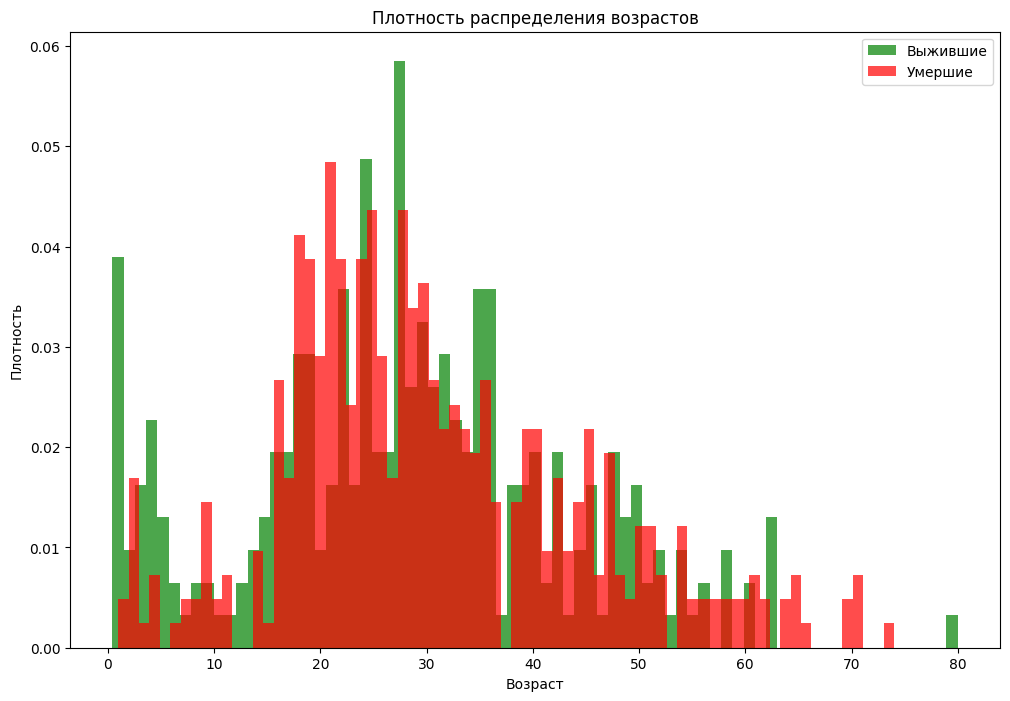

In [96]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=75, alpha=0.7, color='green', label='Выжившие', density=True)
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=75, alpha=0.7, color='red', label='Умершие', density=True)
plt.title('Плотность распределения возрастов')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Распределения похожи, но среди несовершеннолетних больше выживших, так же значительно меньше погибших чем выживших в возрастах от 18 до 25

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл